In [1]:
using Plots
gr()

Plots.GRBackend()

## Example 2 (Polygonal curves)

![](./free_cell_fig2.gif)

In [2]:
P = [(0.0, 0.0), (1.1, 1.1), (2.2, 1.1), (2.2, 2.2), (1.6, 0.6), (2.7, 0.6), (3.7, 1.1)];
Q = [(1.1, 0.0), (0.5, 1.6), (2.7, 1.6), (2.7, 1.1), (3.7, 1.6)];

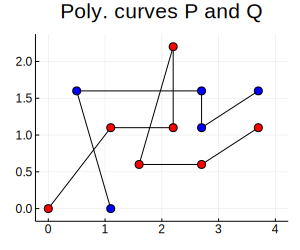

In [3]:
figw = 300
figh = 250
d = plot(size=(figw, figh), leg=false, xlims=[-0.1, 4.1], ylims=[-0.1, 2.3])
colors = [:red, :blue]
for (id, line) in enumerate([P, Q])
    for i in 1:length(line) - 1
        pi, pj = line[i:i+1]
        plot!(d, [pi[1], pj[1]], [pi[2], pj[2]], color=:black)
    end
    scatter!(d, [p[1] for p in line], [p[2] for p in line], color=colors[id])
end
title!(d, "Poly. curves P and Q")
savefig(d, "input2.png")
d

### pairwise free space curves

In [4]:
function compute_free_space(L1, L2; n=25, ϵ=1.0)
    δ1 = (L1[end][1] - L1[1][1], L1[end][2] - L1[1][2]) ./ n
    δ2 = (L2[end][1] - L2[1][1], L2[end][2] - L2[1][2]) ./ n
    lδ = [δ1, δ2]
    
    Fϵ = zeros(Float16, n, n);
    lx = [(L1[1][1] + δ1[1] * i, L1[1][2] + δ1[2] * i) for i in 0:n-1]
    ly = [(L2[1][1] + δ2[1] * i, L2[1][2] + δ2[2] * i) for i in 0:n-1]

    for dx in 1:n
        xi = lx[dx]
        for dy in 1:n
            yi = ly[dy]

            diffx = xi[1] - yi[1]
            diffy = xi[2] - yi[2]
            dxy = sqrt(diffx ^ 2 + diffy ^ 2)
            Fϵ[dx, dy] = dxy <= ϵ ? 0.0 : 1.0
        end
    end
    
    transpose(Fϵ)
end

compute_free_space (generic function with 1 method)

### exampe of using compute_free_space

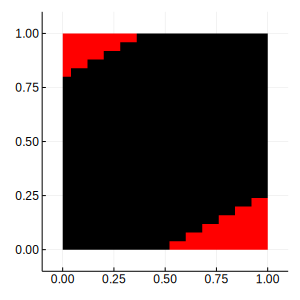

In [9]:
n = 25
ϵ = 1.25
p = 2
q = 2
seg1 = P[p:p+1]
seg2 = Q[q:q+1]
Fpq = compute_free_space(seg1, seg2, n=n, ϵ=ϵ)
d = plot(size=(figw, figw), leg=false, xlims=[-0.1, 1.1], ylims=[-0.1, 1.1])
vx = collect(0:n) ./ n
vy = collect(0:n) ./ n
heatmap!(d, vx, vy, Fpq, c=ColorGradient([:black, :red]))
d

In [8]:
@show P;
@show Q;
nP = length(P)
nQ = length(Q)
n = 200
ϵ = 1.1
println("$nP segments x $nQ segments")
Fall = zeros((nQ - 1) * n, (nP - 1) * n)
println(size(Fall))

for p in 1:nP-1
    segP = P[p:p+1]
    insertP = 1 + n * (p - 1)
    for q in 1:nQ-1
        segQ = Q[q:q+1]
        insertQ = 1 + n * (q - 1)
        Fpq = compute_free_space(segP, segQ, n=n, ϵ=ϵ)
        Fall[insertQ:insertQ+n-1, insertP:insertP+n-1] .= Fpq
        d = plot(size=(figw, figw), leg=false, xlims=[-0.1, 1.1], ylims=[-0.1, 1.1])
        vx = collect(0:n) ./ n
        vy = collect(0:n) ./ n
        heatmap!(d, vx, vy, transpose(Fpq), c=ColorGradient([:black, :red]))
        # savefig(d, "figures/F_p$(p)_q$(q).png")
    end
end

P = Tuple{Float64,Float64}[(0.0, 0.0), (1.1, 1.1), (2.2, 1.1), (2.2, 2.2), (1.6, 0.6), (2.7, 0.6), (3.7, 1.1)]
Q = Tuple{Float64,Float64}[(1.1, 0.0), (0.5, 1.6), (2.7, 1.6), (2.7, 1.1), (3.7, 1.6)]
7 segments x 5 segments
(800, 1200)


### naive heatmap

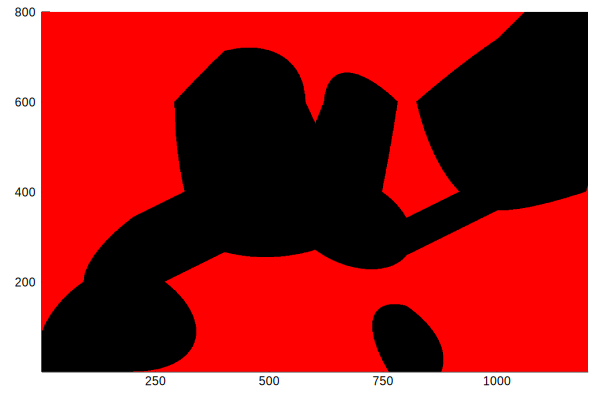

In [10]:
# d = heatmap(transpose(Fall), c=ColorGradient([:black, :red]), colorbar=nothing)
d = heatmap(Fall, c=ColorGradient([:black, :red]), colorbar=nothing)
plot!(d, grid=true)
# for x in [0, 200, 400, 600, 800, 1000, 1200]
#     plot!(d, [x, x], [0, 800], color=:white, lw=1.5, alpha=0.3, linestyle=:dash, leg=false)
# end
# for y in [0, 200, 400, 600, 800]
#     plot!(d, [0, 1200], [y, y], color=:white, lw=1.5, alpha=0.3, linestyle=:dash, leg=false)
# end
savefig(d, "free_space.png")
d

## 手抜き計算

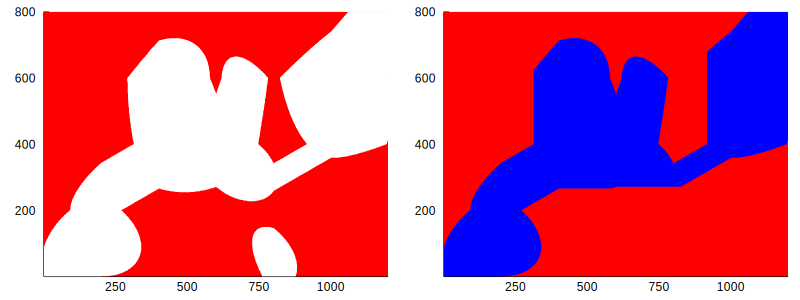

In [12]:
FF = copy(Fall)

# 1列目 & 1行目
for i in 2:size(FF)[1]
    if FF[i - 1, 1] == 1.0
        FF[i, 1] = 1.0
    end
end
for i in 2:size(FF)[2]
    if FF[1, i - 1] == 1.0
        FF[1, i] = 1.0
    end
end
for i in 2:size(FF)[1]
    for j in 2:size(FF)[2]
        # check all of (i-1, j), (i, j-1), (i-1, j-1) are 1.0 => (i, j) must be 1.0
        if FF[i - 1, j] == 1.0 && FF[i - 1, j - 1] == 1.0 && FF[i, j - 1] == 1.0
            FF[i, j] = 1.0
        end
    end
end

d = heatmap(Fall, c=ColorGradient([:white, :red]), colorbar=nothing)
d2 = heatmap(FF, c=ColorGradient([:blue, :red]), colorbar=nothing)
# d
fig = plot(d, d2, layout=(1, 2), size=(800, 300))
savefig(fig, "output4.png")
fig